In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Write a Wrangle Function for the Dataset 

**Let's create our Wrangle Function**

In [12]:
def wrangle(filepath):
    # Read data into filepath
    df = pd.read_csv(filepath)
    # Using 'for loop' to estimate 'mean_price_cols' from 'min_price' & 'max_price'
    price_cols = df[["min_price", "max_price"]]
    mean_values = []
    for index, row in price_cols.iterrows():
        mean_value = row.mean()
        mean_values.append(mean_value)
    df["mean_price_cols"] = mean_price_cols
    # Drop columns with too many cardinality
    df.drop(columns=["commodity", "arrival_date"], inplace=True)
    # Drop leaky columns
    df.drop(columns=["min_price", "max_price", "modal_price"], inplace=True)
  

   
    


    return df

**Using wrangle Function to read file into DataFrame**

In [13]:
filepath = "Rice_2021.csv"
df = wrangle(filepath)
df.head()

,state,district,market,variety,mean_price_cols
0,Gujarat,Dahod,Dahod,Coarse,4250.0
1,Gujarat,Dahod,Dahod,Coarse,4150.0
2,Gujarat,Dahod,Dahod,Coarse,4150.0
3,Gujarat,Dahod,Dahod,Coarse,4150.0
4,Gujarat,Dahod,Dahod,Coarse,4150.0


**Check the dataset information**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68251 entries, 0 to 68250
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         68251 non-null  object
 1   district      68251 non-null  object
 2   market        68251 non-null  object
 3   commodity     68251 non-null  object
 4   variety       68251 non-null  object
 5   arrival_date  68251 non-null  object
 6   min_price     68251 non-null  int64 
 7   max_price     68251 non-null  int64 
 8   modal_price   68251 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.7+ MB


**Use for loop to Iterate through the rows and calculate mean_price from "min_price" & "max_price" of Rice**

**First create a Dataframe for the "min_price" & "max_price" columns assign to variable "price_cols"**

In [9]:
price_cols = df[["min_price", "max_price"]]
price_cols[:5]

,min_price,max_price
0,4000,4500
1,3900,4400
2,3900,4400
3,3900,4400
4,3900,4400


**Now, use "for loop" to iterate through the rows to calculate our "mean_price_cols"**

In [8]:
price_cols = df[["min_price", "max_price"]]
mean_price_cols = []
for index, row in price_cols.iterrows():
    mean_value = row.mean()
    mean_price_cols.append(mean_value)


**Let's check to confirm that the "for loop" is working**  

In [9]:
df["mean_price_cols"] = mean_price_cols
df["mean_price_cols"].head()

0    4250.0
1    4150.0
2    4150.0
3    4150.0
4    4150.0
Name: mean_price_cols, dtype: float64

**Let's drop too high cardinality columns and add to the wrangle function up above**

In [10]:
df.drop(columns=["commodity", "arrival_date"], inplace=True)

**Let's drop leaky columns from the DataFrame and add to the wrangle function up above**

In [11]:
df.drop(columns=["min_price", "max_price", "modal_price"], inplace=True)

# Explore the Dataset

**Let's see the relationship between the "mean_price_cols" & "state" columns**

In [57]:
mean_price_by_state = df.groupby("state")["mean_price_cols"].mean().sort_values(ascending=False)
mean_price_by_state

state
Manipur          4454.545455
Gujarat          4049.538934
Karnataka        3414.696730
Kerala           3408.766626
Maharashtra      3101.341823
Tripura          3011.607430
Odisha           2873.026063
West Bengal      2829.280098
Uttar Pradesh    2477.944980
Jharkhand        2420.204604
Telangana        2261.111111
Name: mean_price_cols, dtype: float64

**Let's create a bar chart to visualize price of Rice by state**

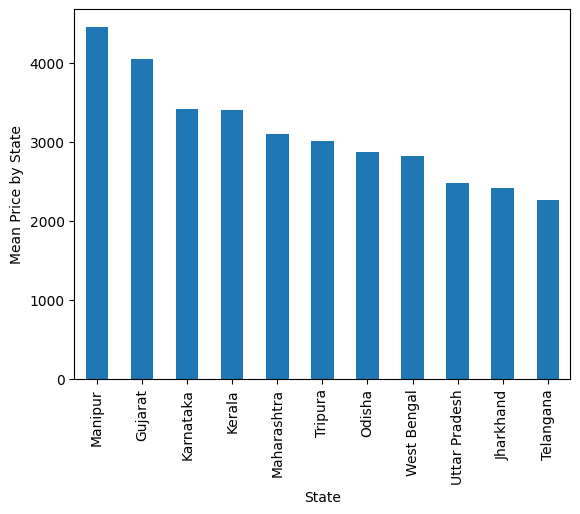

In [75]:
mean_price_by_state.plot(kind="bar", xlabel="State",
                         ylabel="Mean Price by State");

**Let's see the relationship between the "mean_price_cols" & top 10 varieties**

In [63]:
mean_price_by_variety = df.groupby("variety")["mean_price_cols"].mean().sort_values(ascending=False).head(10)
mean_price_by_variety

variety
Basumathi                  10472.727273
Fine(Basmati)               6099.271654
Basmati U.P. (New)          6054.166667
CR 1009 (Coarse) Boiled     4699.783550
Super Fine                  4163.105263
Hamsa St.                   3991.666667
Sona Fine                   3850.000000
Mataa Parboiled             3848.339483
Medium                      3755.525000
Sona                        3468.564815
Name: mean_price_cols, dtype: float64

**Let's visualize the top 10 most selling varieties of Rice in India**

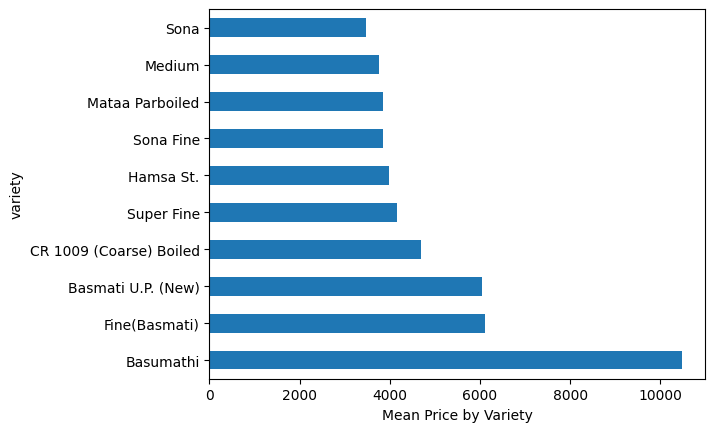

In [66]:
mean_price_by_variety.plot(kind="barh", xlabel="Mean Price by Variety", y="Variety");

**Indeed Basumathi varieties are the best-selling Rice with the most high price in India. Known for their long grains, distinct aroma, and delicious flavor.**

**Let's see the relationship between the "mean_price_cols" & "market" columns** 

In [67]:
mean_price_by_market = df.groupby("market")["mean_price_cols"].mean().sort_values(ascending=False).head(10)
mean_price_by_market

market
Kalimpong              8037.037037
Pune                   5866.666667
Ramanagara             5692.500000
Mumbai                 5427.777778
Bhadravathi            5300.000000
Aroor                  5237.248322
Kolar                  5114.393939
Karjat                 4949.170124
Karsiyang(Matigara)    4917.548077
Gokak                  4808.000000
Name: mean_price_cols, dtype: float64

**Let's Visualize the top 10 Markets with most sales of Rice in India**

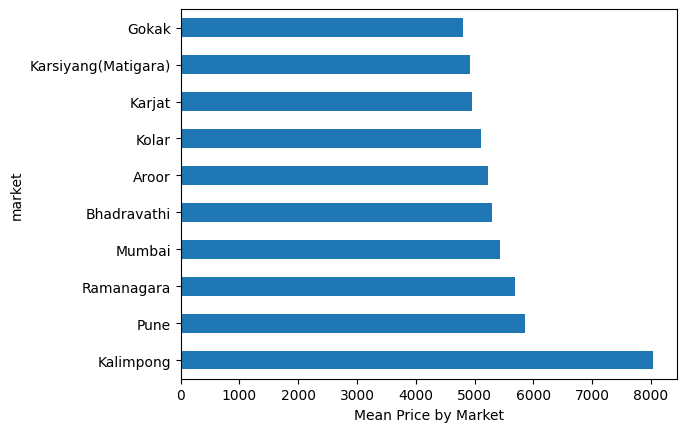

In [68]:
mean_price_by_market.plot(kind="barh", xlabel="Mean Price by Market", y="Market");

**Kalimpong Market Located in West Bengal has most high price of Rice in 2021**

**Let's see the relationship between the "mean_price_cols" & "district" columns**

In [19]:
mean_price_by_district = df.groupby("district")["mean_price_cols"].mean().sort_values(ascending=False).head(10)
mean_price_by_district

district
Mumbai               5427.777778
Alappuzha            5237.248322
Belgaum              4808.000000
Bangalore            4563.461538
Ahmednagar           4543.540000
Mysore               4525.951389
Imphal East          4500.000000
Imphal West          4500.000000
Gautam Budh Nagar    4478.826923
Thoubal              4400.000000
Name: mean_price_cols, dtype: float64

**Let's Visualize the top 10 Districts where price of Rice is most in India**

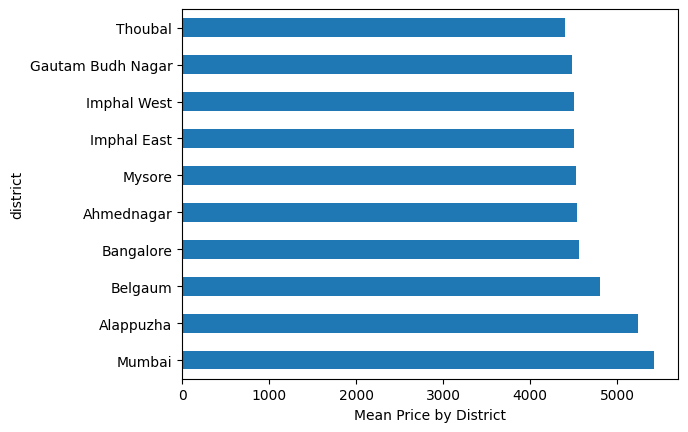

In [20]:
mean_price_by_district.plot(kind="barh", xlabel="Mean Price by District", y="District");

**Rice in Mumbai District was most expensive in 2021 in India**